# Ejercicio de clasificación

En este ejercicio se pide que cargues la base de datos [MNIST](https://en.wikipedia.org/wiki/MNIST_database) y que escribas código para realizar las siguientes tareas:

1. Realices la carga de datos de la base de datos y crees unas particiones de *train* y *test*.

2. Entrenes un clasificador basado en vecino más cercano (*k*-Nearest Neighbor).

3. Implementes una figura de mérito para evaluar la bondad del método.

4. Estudies la influencia del parámetro *k* que define la cantidad de vecinos a utilizar.


Para evaluar la bondad del método utilizarás la métrica llamada "tasa de acierto" (en inglés, *accuracy*). Para un conjunto de datos, esta métrica se define como:

$ acc~(\%)= 100\cdot\frac{\mbox{Cantidad de predicciones correctas}}{\mbox{Tamaño total del conjunto de datos}} $

<br>

### Especificaciones:
* La base de datos MNIST será la que incluye Google Colab en la ruta '/content/sample_data/mnist_train_small.csv'.
* Los elementos de las particiones *train*/*test* deberán llamarse de la siguiente manera:
  *  **x_train**: Características de los datos de *train*.
  *  **y_train**: Etiquetas de los datos de *train*.
  *  **x_test**: Características de los datos de *test*.
  *  **y_test**: Etiquetas de los datos de *test*.
* La función que calcule la tasa de acierto deberá llamarse `tasa_de_acierto` y tener como parámetros las clases objetivo (`y_true`) y las clases predichas (`y_pred`), es decir: `def tasa_de_acierto(y_true, y_pred)`

<br>

En primera instancia realizamos la carga de datos y dividimos los datos entre entrenamiento y validación:

In [1]:
import pandas as pd
import numpy as np

# Cargamos
data = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)

# Separamos entre atributos y clases, y transformamos a Numpy:
Y = np.asarray( data.loc[:,0] )
p = Y.argsort()
Y = Y[p]
X = np.asarray( data.loc[:,1:] )[p]


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    shuffle=True,
                                                    stratify=Y)

A continuación implementamos la métrica "tasa de acierto" (en inglés, *accuracy*) que se ha comentado en el enunciado:

In [2]:
# Implementamos la tasa de acierto:
def tasa_de_acierto(y_true, y_pred):
  aciertos = 0  # Inicializamos una variable a 0 para contar los aciertos
  for idx in range(y_true.shape[0]): # Utilizamos un iterador (idx) para recorrer los vectores
    if y_true[idx] == y_pred[idx]: aciertos += 1 # Si en la posición 'idx' ambos vectores tienen el mismo valor, tenemos un acierto

  return 100*aciertos/y_true.shape[0] # Porcentaje de aciertos con respecto a la cantidad de datos a evaluar

Generamos ahora el código referido al clasificador vecino más cercano (*k*NN):

In [3]:
# Importamos la clase
from sklearn.neighbors import KNeighborsClassifier

# Creamos un objeto con los parámetros por defecto de este clasificador
kNN = KNeighborsClassifier()

# Entrenamos el modelo (método fit):
kNN.fit(x_train, y_train)

# Realizamos la predicción:
y_pred = kNN.predict(x_test)

# Mostramos la bondad de la predicción:
print("Acc: {}%".format(tasa_de_acierto(y_true = y_test, y_pred = y_pred)))

Acc: 96.1%


Mostramos gráficamente el resultado de la predicción:

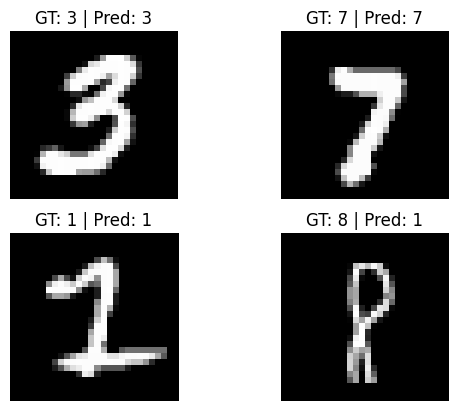

In [9]:
# Importamos la librería gráfica:
import matplotlib.pyplot as plt

# Recorremos cada uno de las sub-figuras a mostrar:
for it in [1,2,3,4]:
  plt.subplot(int("22{}".format(it)))
  idx = np.random.randint(y_test.shape[0]) # Índice de figura a mostrar (aleatorio)
  plt.imshow(x_test[idx].reshape(28,28), cmap='gray') # Mostramos la imagen en escala de grises
  plt.axis('off') # Eliminamos los tics de los ejes X e Y
  plt.title("GT: {} | Pred: {}".format(y_test[idx], y_pred[idx])); # Título

Por último, implementa un bucle que cambie el número de vecinos (*k*) en el clasificador. En cada iteración deberás:


*   Llamar de nuevo al constructor del clasificador (`KNeighborsClassifier`) con el parámetro de la cantidad de vecinos (`n_neighbors`).
*   Entrenar el modelo (método `fit`).
*   Predecir sobre los datos de test (método `predict`).



In [10]:
# Iteramos por los diferentes valores de k:
for k in [1,3,5,7,9]:
  # Instanciamos el clasificador con el parámetro de k correspondiente:
  kNN = KNeighborsClassifier(n_neighbors=k)

  # Entrenamos el clasificador:
  kNN.fit(x_train, y_train)

  # Realizamos la predicción:
  y_pred = kNN.predict(x_test)

  # Mostramos el resultado:
  print("k={} -> Acc: {}%".format(k, tasa_de_acierto(y_true = y_test, y_pred = y_pred)))

k=1 -> Acc: 96.15%
k=3 -> Acc: 96.25%
k=5 -> Acc: 96.1%
k=7 -> Acc: 96.05%
k=9 -> Acc: 95.675%
